# [CPSC 222](https://github.com/GonzagaCPSC222) Intro to Data Science
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# NLP and Data Science
What are our learning objectives for this lesson?
* Clean text to prepare for analyses
* Visualize word frequencies with bar charts and word clouds
* Compute and interpret Readability statistics
* Perform named entity recognition
* Calculate document similarity

Content used in this lesson is based upon information in the following sources:
* Intro to Python for Computer Science and Data Science by Deitel and Deitel

## Text Cleaning
* Applying common string operations, like converting all the text to lower case
* Fixing misspelled words
* Performing normalization using stemming and/or lemmatization
* Handling contractions
* Removing stop words

## Stop Words

In [24]:
# stop words
# a stop word is a common word in text that is often removed from text before analyzing
# because they typically do not provide useful information
import nltk

nltk.download("stopwords")

from nltk.corpus import stopwords

stops = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sprint/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# remove stop words
blob = TextBlob(gu_cs_text.lower())
no_stops_cs_text = []
for word in blob.words:
    if word not in stops:
        no_stops_cs_text.append(word)
print(no_stops_cs_text)

['computer', 'science', 'program', 'gonzaga', 'prepares', 'students', 'careers', 'graduate', 'study', 'practice', 'science', 'computing', 'program', 'built', 'broad', 'rigorous', 'foundation', 'science', 'mathematics', 'software', 'engineering', 'advanced', 'computer', 'science', 'topics']


## Visualizing Word Frequencies w/Bar Charts and Word Clouds

In [27]:
# visualize word frequencies with bar charts
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# word frequencies demo
# clean first 
blob = TextBlob(gu_cs_text.lower())
cleaned_cs_text = []
for word in blob.words:
    if word not in stops:
        cleaned_cs_text.append(word.lemmatize())
print(cleaned_cs_text)
cleaned_blob = TextBlob(" ".join(cleaned_cs_text))
print(cleaned_blob.word_counts["science"])
counts_ser = pd.Series(cleaned_blob.word_counts)
counts_ser = counts_ser.sort_values(ascending=False)

viridis = cm.get_cmap("viridis", len(counts_ser))
plt.bar(counts_ser.index, counts_ser, color=viridis.colors[::-1])
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

['computer', 'science', 'program', 'gonzaga', 'prepares', 'student', 'career', 'graduate', 'study', 'practice', 'science', 'computing', 'program', 'built', 'broad', 'rigorous', 'foundation', 'science', 'mathematics', 'software', 'engineering', 'advanced', 'computer', 'science', 'topic']
4


<Figure size 640x480 with 1 Axes>

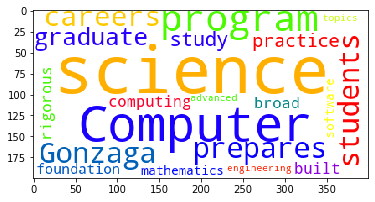

In [28]:
# visualizing word frequencies with word clouds
from wordcloud import WordCloud
plt.figure()
wordcloud = WordCloud(colormap="prism", background_color="white")
wordcloud = wordcloud.generate(gu_cs_text)
# write to file
#wordcloud.to_file("wordcloud.png")
# plot with matplotlib
plt.imshow(wordcloud)
plt.show()

## Readability Assessment w/Textatistic

In [29]:
# readability is affected by the vocabulary used, sentence structure, sentence length, topic, etc.
# there are many formulas for assesing readability
from textatistic import Textatistic

readability = Textatistic(gu_cs_text)
for stat, value in readability.dict().items():
    print(stat, ":", value)

char_count : 232
word_count : 40
sent_count : 2
sybl_count : 69
notdalechall_count : 20
polysyblword_count : 6
flesch_score : 40.60000000000002
fleschkincaid_score : 12.565000000000005
gunningfog_score : 14.0
smog_score : 13.023866798666859
dalechall_score : 12.523499999999999


* char_count: number of characters in the text
* word_count: number of words in the text
* sent_count: number of sentences in the text
* sybl_count: number of syllables in the text
* notdalechall_count: count of words that are not on the Dale-Chall list (list of words understood by 80% of 5th graders); higher this number is compared to the total word count, the less readable the text is considered to be
* polysyblword_count: number of words with three or more syllables
* flesch_score: Flesch Reading Ease score, which can be mapped to a grade level (scores > 90 are readable by 5th graders; scores < 30 require a college degree)
* fleschkincaid_score: Flesch-Kincaid score, which corresponds to a specific grade level
* gunningfog_score: Gunning Fog index value, which corresponds to a specific grade level
* smog_score: Simple Measure of Gobbledygook (SMOG), which corresponds to the years of education requried to understand text
* dalechall_score: Dale-Chall score, which can be mapped to grade levels from 4 and below to college graduate (grade 16) and above
    * Note: this score is considered to be most reliable for a broad range of text types

In [30]:
# task
# calculate the average number of words per sentence, characters per word, and syllables per word
print("Average number of words per sentence:", readability.word_count / readability.sent_count)
print("Average characters per word:", readability.char_count / readability.word_count)
print("Average syllables per word:", readability.sybl_count / readability.word_count)

Average number of words per sentence: 20.0
Average characters per word: 5.8
Average syllables per word: 1.725


## Named Entity Recognition w/spaCy

In [35]:
# attempts to locate and categorize items like 
# dates, times, quantities, places, people, things, organizations, etc.
# see https://spacy.io/api/annotation#named-entities for a list of spaCy's named entities
import spacy

nlp = spacy.load("en")

document = nlp(gu_cs_text)

for entity in document.ents:
    print(entity.text, "->", entity.label_)
# GPE is countries, cities, states

Gonzaga -> GPE


In [37]:
# task
# display the named entities in "Paul J. Deitel is CEO of Deitel & Associates, Inc."
document = nlp("Paul J. Deitel is CEO of Deitel & Associates, Inc.")
for entity in document.ents:
    print(entity.text, "->", entity.label_)

Paul J. Deitel -> PERSON
Deitel & Associates, Inc. -> ORG


## Similarity Detection w/spaCy

In [42]:
# similarity detection is the process of analyzing documents to determine how alike they are
# e.g. based on word frequencies, writing style, etc.
from pathlib import Path

# download text from project gutenberg
# remove header of text about project
doc1 = nlp(Path("romeojuliet.txt").read_text()) # http://www.gutenberg.org/cache/epub/1112/pg1112.txt
doc2 = nlp(Path("edwardthesecond.txt").read_text()) # http://www.gutenberg.org/cache/epub/20288/pg20288.txt
# similarity returns a value from 0.0 (not similar) to 1.0 (identical) indicating
# how similar the documents are
print(doc1.similarity(doc2))

0.922103052979811


/Users/sprint/opt/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
